In [409]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbs

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

from IPython.display import HTML

# Black Friday Dataset (predicting purchase value)

## Introduction

In [148]:
df_black = pd.read_csv("black-friday/BlackFriday.csv")

In [86]:
df_black.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [21]:
df_black.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Replacing non-numeric values w/ numeric values

### Droping First 2 Columns

In [155]:
df_black = df_black.drop('User_ID', axis=1)
df_black = df_black.drop('Product_ID', axis=1)

In [156]:
for col in df_black.columns:
    if col == "Purchase":
        continue
    unique = df_black[col].unique()
    print(col)
    for i, pos in enumerate(unique):
        df_black[col] = df_black[col].replace(pos, i)
    

Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3


## Correlation Matrix

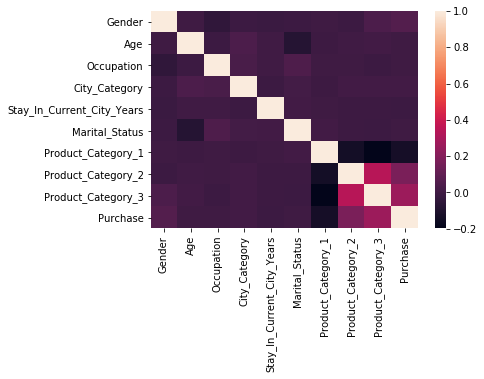

In [333]:
sbs.heatmap(df_black.corr())
plt.show()

---
# Training Random Forest Regressor (10 trees)

In [398]:
rf = RandomForestRegressor(n_estimators = 10, n_jobs = 4)

x = np.array(df_black)[:, 0:9]
y = np.array(df_black)[:, 9]

features_label = df_black.columns[0:9]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)

In [399]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

---
# Evaluating Random Forest Regressor

In [400]:
y_pred = rf.predict(x_test)

In [401]:
print("R^2 score = {:.3f}".format(r2_score(y_pred, y_test)))
print("Mean Absolute Error = {:.3f}".format(mean_absolute_error(y_pred, y_test)))
print("Mean Percentual Absolute Error = {:.2f}%".format(100 *mean_absolute_error(y_pred, y_test) / (np.sum(y_test) / len(y_test))))

R^2 score = 0.275
Mean Absolute Error = 2492.206
Mean Percentual Absolute Error = 26.69%


## Feature importances

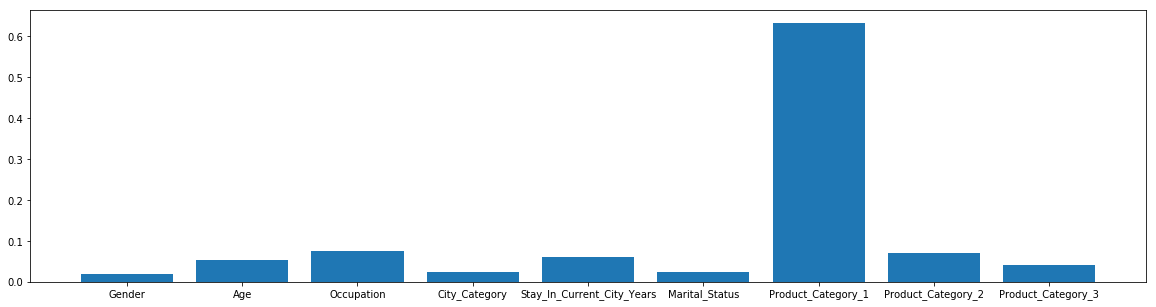

In [404]:
plt.figure(figsize=(20,5))
plt.bar(features_label, rf.feature_importances_)
plt.show()

---
# Wine Dataset (predicting wine score)

## Introduction

In [205]:
df_wine = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [206]:
df_wine.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [207]:
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Replacing non-number values w/ number values

### Droping Some Columns

In [208]:
# Droping first column
df_wine = df_wine.drop('Unnamed: 0', axis=1)

# Droping description column
df_wine = df_wine.drop('description', axis=1)

# Droping designation column
df_wine = df_wine.drop('designation', axis=1)

# Droping title column
df_wine = df_wine.drop('title', axis=1)

In [209]:
for col in df_wine.columns:
    if col == 'price' or col == 'points':
        continue
    unique = df_wine[col].unique()
    print(col)
    for i, pos in enumerate(unique):
        df_wine[col] = df_wine[col].replace(pos, i)

country
province
region_1
region_2
taster_name
taster_twitter_handle
variety
winery


In [210]:
df_wine = df_wine.dropna()

## Correlation Matrix

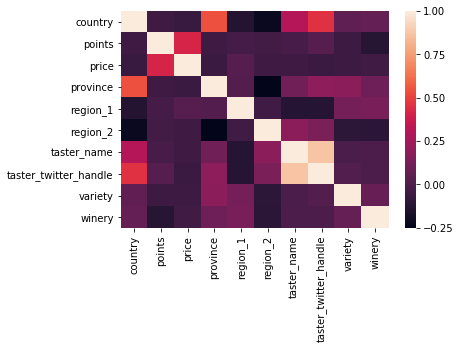

In [334]:
sbs.heatmap(df_wine.corr())
plt.show()

---
# Training Random Forest Regressor (10 trees)

In [373]:
rf = RandomForestRegressor(n_jobs = 4, n_estimators =10)

In [388]:
x = np.hstack( (np.array(df_wine)[:, 0].reshape(120975, 1), np.array(df_wine)[:, 2:]) )
y = np.array(df_wine)[:, 1]

features_label = np.hstack((df_wine.columns[0], df_wine.columns[2:]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33)

In [389]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

---
# Evaluating Random Forest Regressor

In [390]:
y_pred = rf.predict(x_test)

In [391]:
print("R^2 score = {:.3f}".format(r2_score(y_pred, y_test)))
print("Mean Absolute Error = {:.3f}".format(mean_absolute_error(y_pred, y_test)))
print("Mean Percentual Absolute Error = {:.2f}%".format(100 *mean_absolute_error(y_pred, y_test) / (np.sum(y_test) / len(y_test))))

R^2 score = 0.203
Mean Absolute Error = 1.669
Mean Percentual Absolute Error = 1.89%


## Feature Importances

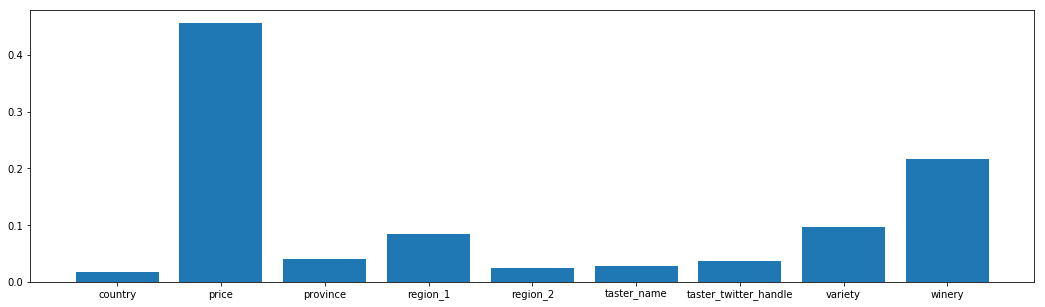

In [395]:
plt.figure(figsize=(18,5))
plt.bar(features_label, rf.feature_importances_)
plt.show()